# Students Do: Preventing credit card defaults with neural networks

In this activity, you will train a neural network model to predict whether a credit card holder will default in the next month.

The dataset provided contains `30,000` anonymous records of credit default status with `23` features columns and one binary target column entitled _DEFAULT_, where `1` represents a defaulted credit card.

The `23` features include demographic info (age, gender, marital status, etc.), credit limit, past payment details, and other relevant information.

You are tasked to create a neural network model to predict if a credit card holder will default.

In [60]:
# Initial imports
import pandas as pd
from path import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [61]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(126)

## Instructions

1. Load the data in a Pandas DataFrame.

In [62]:
# Read in data
file_path = Path("../Resources/cc_default.csv")
cc_df = pd.read_csv(file_path)
cc_df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


2. Define the features set `X` by including all the columns of the DataFrame except the `DEFAULT` column.

In [63]:
# Define features data
X = cc_df.drop(columns= ["DEFAULT"])




3. Create the target vector `y` by assigning the values of the `DEFAULT` column of the DataFrame.

In [64]:
# Define target data
y = cc_df["DEFAULT"]


4. Create the training an testing sets using the `train_test_split` function from `sklearn`.

In [65]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=78
)


5. Scale the features data using the `StandardScaler` from `sklearn`.

In [66]:
# Create the scaler instance
X_scaler = StandardScaler()


In [67]:
# Fit the scaler
X_scaler.fit(X_train)


StandardScaler()

In [68]:
# Scale the features data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

6. Create a neural network model with `23` inputs, one hidden layer with `69` units, and an output layer with a single output. Use the `relu` activation function for the first layer and `sigmoid` for the second layer.

In [69]:
# Create a sequential model
neuron = Sequential()

In [70]:
# Define the model
number_inputs = 23
number_hidden_nodes = 69

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [71]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

7. Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and `accuracy` as additional metric.

In [72]:
# Compile model
#neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
neuron.compile(loss="binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])

8. Fit the model with `100` epochs.

In [73]:
# Fit the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4932 - accuracy: 0.7985
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4611 - accuracy: 0.8106
Epoch 3/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4539 - accuracy: 0.8130
Epoch 4/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4499 - accuracy: 0.8152
Epoch 5/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4472 - accuracy: 0.8160
Epoch 6/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4447 - accuracy: 0.8177
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4432 - accuracy: 0.8172
Epoch 8/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4413 - accuracy: 0.8183
Epoch 9/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4401 - accuracy: 0.8182
Epoch 10/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4388 - accura

9. Plot the loss function and accuracy.

<AxesSubplot:>

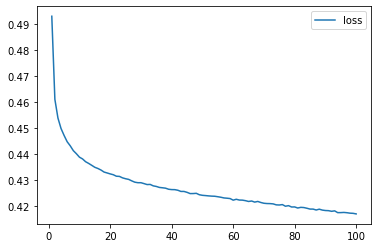

In [74]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss

df.plot(y="loss")

<AxesSubplot:>

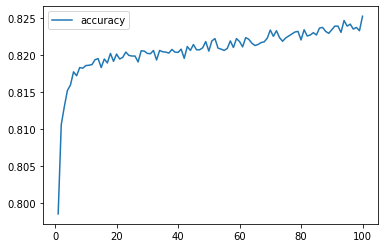

In [75]:
# Plot the accuracy
df.plot(y="accuracy")


10. Evaluate the model using testing data and the `evaluate` method.

In [76]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


235/235 - 0s - loss: 0.4320 - accuracy: 0.8219 - 350ms/epoch - 1ms/step
Loss: 0.4320216774940491, Accuracy: 0.8218666911125183


## Challenge

For this challenge section, you have to figure out how the model you created could be modified to improve the accuracy.

1. Review the Keras documentation about activation functions, and decide if there is anyone that could be used instead of `sigmoid`.

2. Add a second hidden layer with `69` units and use a different activation function than `sigmoid`.

3. Change any other parameter that you believe could improve the model's accuracy.

4. Evaluate the model's accuracy and loss and write down your conclusions.

In [77]:
# Define the model



In [78]:
# Compile model



In [79]:
# Fit the model



In [80]:
# Evaluate the model fit with linear dummy data



### Conclusions

**Your Answer Here**